In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/waterlevels/chennai_reservoir_levels.csv


In [12]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.1 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
data = pd.read_csv('/kaggle/input/waterlevels/chennai_reservoir_levels.csv')

In [31]:
data

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0
...,...,...,...,...,...
5831,19-12-2019,1535.0,139.0,2318.0,1397.0
5832,20-12-2019,1529.0,131.0,2335.0,1435.0
5833,21-12-2019,1522.0,123.0,2351.0,1473.0
5834,22-12-2019,1514.0,115.0,2369.0,1510.0


In [119]:
data

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2004-01-01,3.9,0.0,268.0,0.0
2004-01-02,3.9,0.0,268.0,0.0
2004-01-03,3.9,0.0,267.0,0.0
2004-01-04,3.9,0.0,267.0,0.0
2004-01-05,3.8,0.0,267.0,0.0
...,...,...,...,...
2019-12-19,1535.0,139.0,2318.0,1397.0
2019-12-20,1529.0,131.0,2335.0,1435.0
2019-12-21,1522.0,123.0,2351.0,1473.0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5836 entries, 2004-01-01 to 2019-12-23
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   POONDI           5836 non-null   float64
 1   CHOLAVARAM       5836 non-null   float64
 2   REDHILLS         5836 non-null   float64
 3   CHEMBARAMBAKKAM  5836 non-null   float64
dtypes: float64(4)
memory usage: 228.0 KB


In [53]:
data=data.dropna()
data.head()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2004-01-01,3.9,0.0,268.0,0.0
2004-01-02,3.9,0.0,268.0,0.0
2004-01-03,3.9,0.0,267.0,0.0
2004-01-04,3.9,0.0,267.0,0.0
2004-01-05,3.8,0.0,267.0,0.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5836 entries, 2004-01-01 to 2019-12-23
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   POONDI           5836 non-null   float64
 1   CHOLAVARAM       5836 non-null   float64
 2   REDHILLS         5836 non-null   float64
 3   CHEMBARAMBAKKAM  5836 non-null   float64
dtypes: float64(4)
memory usage: 228.0 KB


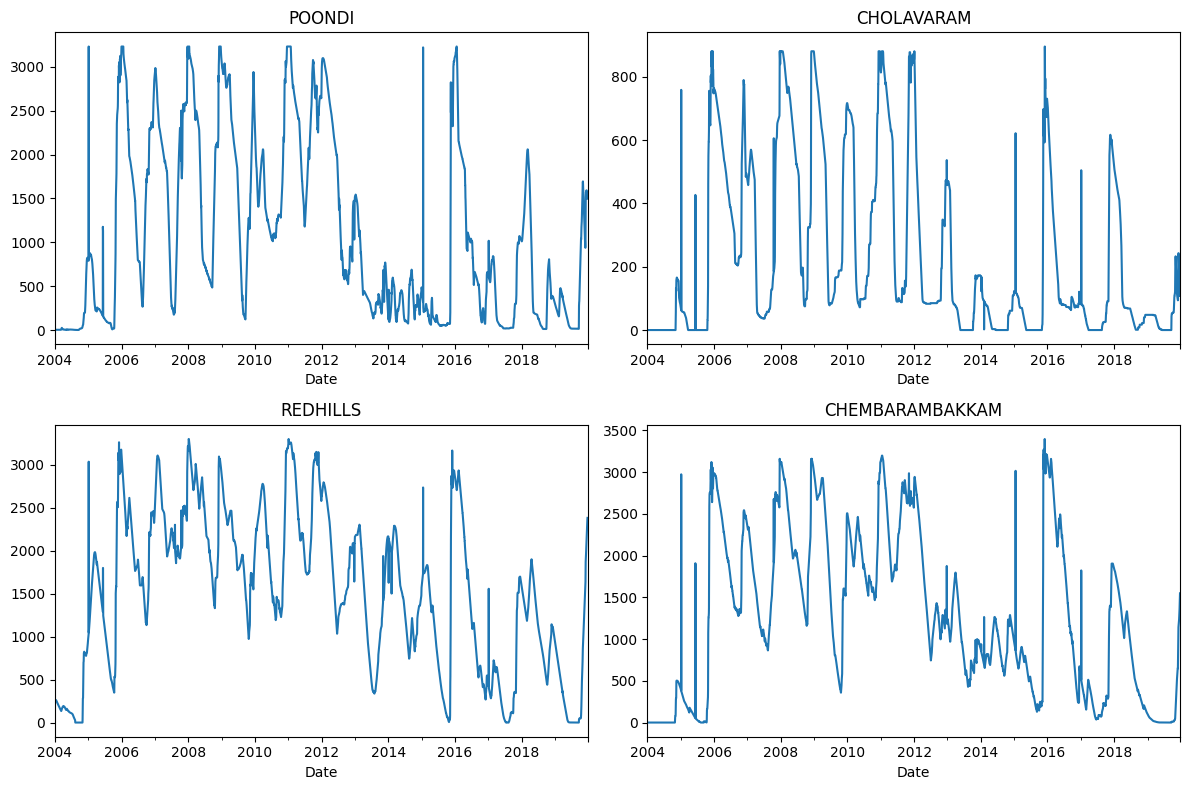

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot each data series on a separate subplot
data['POONDI'].plot(ax=axs[0, 0], title='POONDI')
data['CHOLAVARAM'].plot(ax=axs[0, 1], title='CHOLAVARAM')
data['REDHILLS'].plot(ax=axs[1, 0], title='REDHILLS')
data['CHEMBARAMBAKKAM'].plot(ax=axs[1, 1], title='CHEMBARAMBAKKAM')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [55]:
from statsmodels.tsa.stattools import adfuller

def adf(df):
    dftest=adfuller(df,autolag='AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-value: ", dftest[1])
    print("3. No.of lags: ", dftest[2])
    print("4. No. of observation used for ADF Regression and Critical value calculation: ", dftest[3])
    print("5. Critical values: ")
    for k, v in dftest[4].items():
        print("\t",k, " : ", v)

pip install pmdarima

In [56]:
adf(data["POONDI"])
adf(data["CHOLAVARAM"])
adf(data["REDHILLS"])
adf(data["CHEMBARAMBAKKAM"])

1. ADF:  -3.9921010265571435
2. P-value:  0.0014524420844529726
3. No.of lags:  15
4. No. of observation used for ADF Regression and Critical value calculation:  5820
5. Critical values: 
	 1%  :  -3.4314740870339353
	 5%  :  -2.8620367403219062
	 10%  :  -2.5670344128257816
1. ADF:  -4.130481005344195
2. P-value:  0.0008620671783907479
3. No.of lags:  11
4. No. of observation used for ADF Regression and Critical value calculation:  5824
5. Critical values: 
	 1%  :  -3.4314733146554572
	 5%  :  -2.862036399068032
	 10%  :  -2.5670342311666485
1. ADF:  -4.194723452830973
2. P-value:  0.0006725831954888324
3. No.of lags:  16
4. No. of observation used for ADF Regression and Critical value calculation:  5819
5. Critical values: 
	 1%  :  -3.4314742802945455
	 5%  :  -2.862036825708699
	 10%  :  -2.5670344582795996
1. ADF:  -3.585098107430215
2. P-value:  0.0060523946054280115
3. No.of lags:  16
4. No. of observation used for ADF Regression and Critical value calculation:  5819
5. Critica

In [57]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [58]:
stepwise_fit1 = auto_arima(data['POONDI'], trace=True, suppress_warnings=True)
stepwise_fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=66905.811, Time=6.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=67799.643, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=67138.355, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=67187.135, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=67797.702, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=66906.454, Time=3.55 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=67127.836, Time=2.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=66907.736, Time=19.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=66907.968, Time=21.63 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=67132.864, Time=0.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=66905.748, Time=10.66 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=67066.760, Time=2.48 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=66907.611, Time=16.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=67106.433, Time=2.02 sec
 ARIMA(0,1,4)(0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5836
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -33446.889
Date:                Sun, 04 Aug 2024   AIC                          66903.778
Time:                        09:28:07   BIC                          66937.137
Sample:                    01-01-2004   HQIC                         66915.379
                         - 12-23-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9330      0.012     76.739      0.000       0.909       0.957
ma.L1         -1.3088      0.012   -107.169      0.000      -1.333      -1.285
ma.L2          0.4300      0.005     85.644      0.000       0.420       0.440
ma.L3         -0.0235      0.003     -7.416      0.000      -0.030      -0.017
sigma2      5576.5017      5.962    935.405      0.000    5564.817    5588.186
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         120004530.96
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            12.24
Prob(H) (two-sided):                  0.00   Kurtosis:                       705.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
print(data.shape)
train=data.iloc[:-30]
test=data.iloc[-30:]
print(train.shape, test.shape)

(5836, 4)
(5806, 4) (30, 4)


In [61]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model1 = ARIMA(data['POONDI'], order=(1, 1, 3))
result = model1.fit()

# Display the summary
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                 POONDI   No. Observations:                 5836
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -33446.889
Date:                Sun, 04 Aug 2024   AIC                          66903.778
Time:                        09:30:41   BIC                          66937.137
Sample:                    01-01-2004   HQIC                         66915.379
                         - 12-23-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9330      0.012     76.739      0.000       0.909       0.957
ma.L1         -1.3088      0.012   -107.169      0.000      -1.333      -1.285
ma.L2          0.4300      0.005     85.644      0.0

In [62]:
start=len(train)
end=len(train)+len(test)-1
pred=result.predict(start=start, end=end, typ='levels')
print(pred)
#

2019-11-24    1087.195448
2019-11-25    1050.348918
2019-11-26    1007.687173
2019-11-27     976.745216
2019-11-28     952.119331
2019-11-29     930.041659
2019-11-30     918.221126
2019-12-01     915.703350
2019-12-02     948.968527
2019-12-03    1117.459553
2019-12-04    1324.675000
2019-12-05    1476.902509
2019-12-06    1560.060300
2019-12-07    1603.783054
2019-12-08    1612.642702
2019-12-09    1614.764580
2019-12-10    1617.646734
2019-12-11    1622.386742
2019-12-12    1621.633510
2019-12-13    1618.418185
2019-12-14    1610.276353
2019-12-15    1602.009081
2019-12-16    1590.549373
2019-12-17    1576.547948
2019-12-18    1566.730165
2019-12-19    1545.698151
2019-12-20    1538.354649
2019-12-21    1531.909517
2019-12-22    1524.667791
2019-12-23    1516.457020
Freq: D, Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

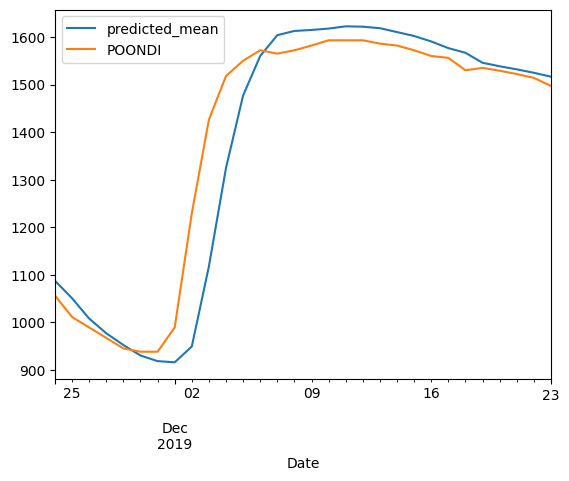

In [63]:
pred.plot(legend=True)
test['POONDI'].plot(legend=True)

In [64]:
test['POONDI'].mean()

1386.9666666666667

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['POONDI']))
print(rmse)

89.08554600207255


# For future dates

In [66]:
data.tail()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
Date,,,,
2019-12-19,1535.0,139.0,2318.0,1397.0
2019-12-20,1529.0,131.0,2335.0,1435.0
2019-12-21,1522.0,123.0,2351.0,1473.0
2019-12-22,1514.0,115.0,2369.0,1510.0
2019-12-23,1497.0,108.0,2382.0,1548.0


In [67]:
pred = result.predict(start=len(data), end=len(data)+20000, typ='levels').rename('ARIMA Predictions1')

# Create a new index for the prediction period
index_future_dates = pd.date_range(start='2019-12-24', periods=len(pred))

# Assign the new index to the predictions
pred.index = index_future_dates

print(pred)

2019-12-24    1502.250720
2019-12-25    1499.033156
2019-12-26    1496.489277
2019-12-27    1494.115938
2019-12-28    1491.901706
                 ...     
2074-09-22    1461.087095
2074-09-23    1461.087095
2074-09-24    1461.087095
2074-09-25    1461.087095
2074-09-26    1461.087095
Freq: D, Name: ARIMA Predictions1, Length: 20001, dtype: float64


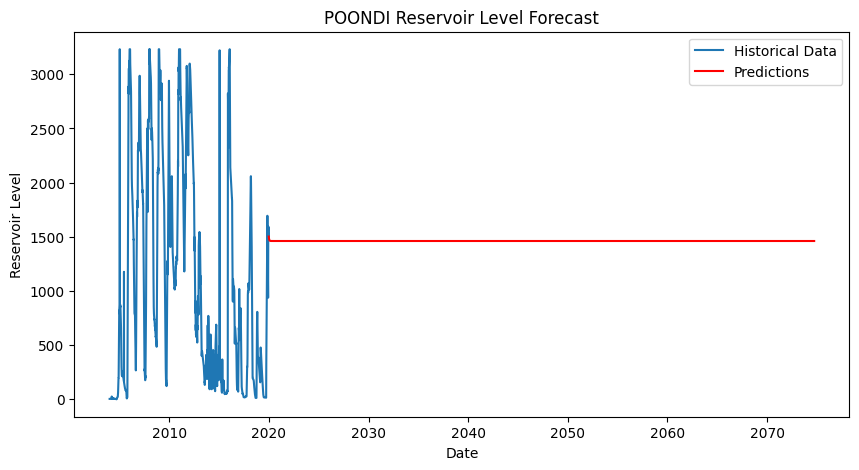

In [68]:
plt.figure(figsize=(10,5))
plt.plot(data['POONDI'], label='Historical Data')
plt.plot(pred, label='Predictions', color='red')
plt.title('POONDI Reservoir Level Forecast')
plt.xlabel('Date')
plt.ylabel('Reservoir Level')
plt.legend()
plt.show()

In [69]:
import pickle

# Save the model
with open('arima_model1.pkl', 'wb') as pkl:
    pickle.dump(result, pkl)

In [70]:
stepwise_fit1 = auto_arima(data['CHOLAVARAM'], trace=True, suppress_warnings=True)
stepwise_fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=52874.867, Time=8.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=53310.283, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=52990.501, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=53022.014, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=53308.286, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=52873.789, Time=7.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=52986.419, Time=1.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=52989.780, Time=0.91 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=52875.211, Time=8.83 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=52987.246, Time=2.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=52885.746, Time=2.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=52871.900, Time=18.39 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=52866.030, Time=25.84 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=52889.348, Time=10.68 sec
 ARIMA(4,1,3)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5836
Model:               SARIMAX(1, 1, 4)   Log Likelihood              -26424.320
Date:                Sun, 04 Aug 2024   AIC                          52860.640
Time:                        09:37:39   BIC                          52900.669
Sample:                    01-01-2004   HQIC                         52874.560
                         - 12-23-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9233      0.012     74.934      0.000       0.899       0.947
ma.L1         -1.1717      0.012    -94.809      0.000      -1.196      -1.147
ma.L2          0.2933      0.005     64.962      0.000       0.284       0.302
ma.L3         -0.0665      0.005    -12.293      0.000      -0.077      -0.056
ma.L4          0.0547      0.005     10.883      0.000       0.045       0.065
sigma2       502.2467      0.771    651.354      0.000     500.735     503.758
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          34209269.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             6.16
Prob(H) (two-sided):                  0.00   Kurtosis:                       377.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
model1 = ARIMA(data['CHOLAVARAM'], order=(1, 1, 4))
result2 = model1.fit()

# Display the summary
print(result2.summary())

                               SARIMAX Results                                
Dep. Variable:             CHOLAVARAM   No. Observations:                 5836
Model:                 ARIMA(1, 1, 4)   Log Likelihood              -26424.320
Date:                Sun, 04 Aug 2024   AIC                          52860.640
Time:                        09:39:10   BIC                          52900.669
Sample:                    01-01-2004   HQIC                         52874.560
                         - 12-23-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9233      0.012     74.934      0.000       0.899       0.947
ma.L1         -1.1717      0.012    -94.809      0.000      -1.196      -1.147
ma.L2          0.2933      0.005     64.962      0.0

In [72]:
start=len(train)
end=len(train)+len(test)-1
pred=result2.predict(start=start, end=end, typ='levels')
print(pred)
#

2019-11-24    103.661681
2019-11-25    101.827800
2019-11-26    100.097514
2019-11-27     98.408260
2019-11-28     96.720049
2019-11-29     95.003059
2019-11-30     93.249101
2019-12-01     92.209734
2019-12-02     93.641424
2019-12-03    120.605554
2019-12-04    182.182752
2019-12-05    220.551398
2019-12-06    236.928381
2019-12-07    246.974613
2019-12-08    250.785429
2019-12-09    246.246077
2019-12-10    238.251749
2019-12-11    228.660523
2019-12-12    218.311220
2019-12-13    207.781139
2019-12-14    197.289801
2019-12-15    186.933880
2019-12-16    176.754733
2019-12-17    166.755457
2019-12-18    156.921966
2019-12-19    147.234301
2019-12-20    138.422796
2019-12-21    129.966266
2019-12-22    121.602814
2019-12-23    113.349286
Freq: D, Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

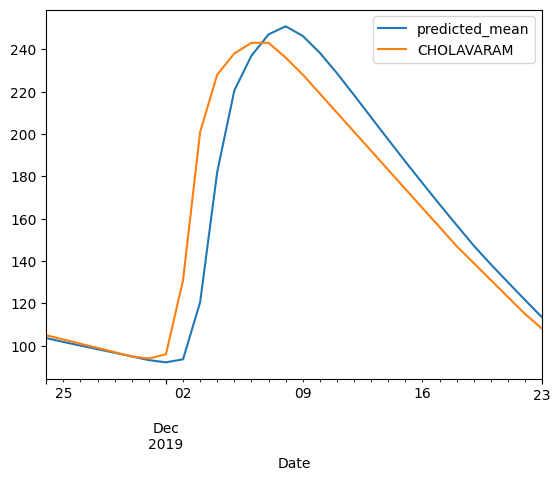

In [73]:
pred.plot(legend=True)
test['CHOLAVARAM'].plot(legend=True)

In [74]:
test['CHOLAVARAM'].mean()

160.03333333333333

In [75]:
rmse2=sqrt(mean_squared_error(pred,test['CHOLAVARAM']))
print(rmse2)

20.91341306641935


In [76]:
pred = result2.predict(start=len(data), end=len(data)+20000, typ='levels').rename('ARIMA Predictions2')

# Create a new index for the prediction period
index_future_dates = pd.date_range(start='2019-12-24', periods=len(pred))

# Assign the new index to the predictions
pred.index = index_future_dates

print(pred)

2019-12-24    105.924540
2019-12-25    102.496857
2019-12-26     99.326220
2019-12-27     96.105947
2019-12-28     93.132585
                 ...    
2074-09-22     57.326658
2074-09-23     57.326658
2074-09-24     57.326658
2074-09-25     57.326658
2074-09-26     57.326658
Freq: D, Name: ARIMA Predictions2, Length: 20001, dtype: float64


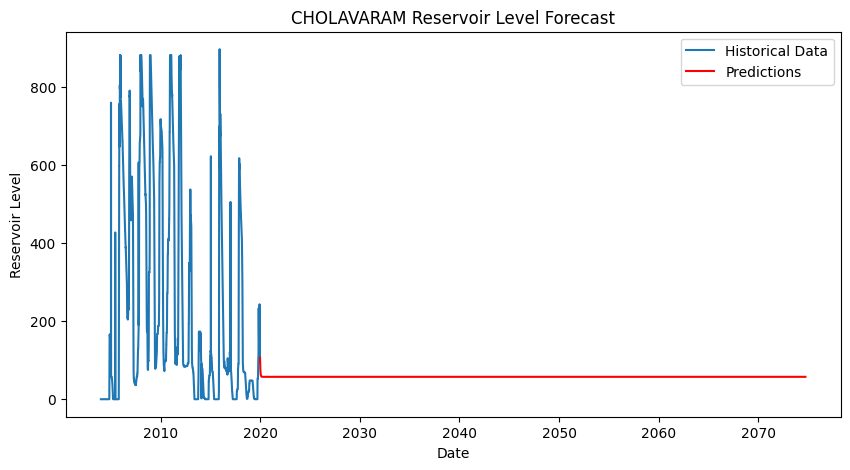

In [77]:
plt.figure(figsize=(10,5))
plt.plot(data['CHOLAVARAM'], label='Historical Data')
plt.plot(pred, label='Predictions', color='red')
plt.title('CHOLAVARAM Reservoir Level Forecast')
plt.xlabel('Date')
plt.ylabel('Reservoir Level')
plt.legend()
plt.show()

In [78]:
with open('arima_model2.pkl', 'wb') as pkl:
    pickle.dump(result2, pkl)

In [79]:
stepwise_fit1 = auto_arima(data['REDHILLS'], trace=True, suppress_warnings=True)
stepwise_fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=63115.294, Time=11.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=63915.216, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=63471.777, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=63530.231, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=63913.445, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=63113.461, Time=6.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=63431.957, Time=2.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=63473.276, Time=0.84 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=63115.295, Time=11.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=63371.837, Time=5.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=63207.772, Time=3.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=63117.066, Time=11.19 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=63111.560, Time=3.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=63430.314, Time=1.80 sec
 ARIMA(1,1,1)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5836
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -31551.780
Date:                Sun, 04 Aug 2024   AIC                          63111.560
Time:                        09:41:46   BIC                          63138.247
Sample:                    01-01-2004   HQIC                         63120.841
                         - 12-23-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9319      0.006    156.279      0.000       0.920       0.944
ma.L1         -1.2548      0.006   -199.119      0.000      -1.267      -1.242
ma.L2          0.3759      0.002    156.501      0.000       0.371       0.381
sigma2      2912.3492      3.867    753.194      0.000    2904.771    2919.928
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):          55341266.34
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             8.48
Prob(H) (two-sided):                  0.00   Kurtosis:                       479.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
model1 = ARIMA(data['REDHILLS'], order=(1, 1, 2))
result3 = model1.fit()

# Display the summary
print(result3.summary())

                               SARIMAX Results                                
Dep. Variable:               REDHILLS   No. Observations:                 5836
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -31551.780
Date:                Sun, 04 Aug 2024   AIC                          63111.560
Time:                        09:42:39   BIC                          63138.247
Sample:                    01-01-2004   HQIC                         63120.841
                         - 12-23-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9319      0.006    156.279      0.000       0.920       0.944
ma.L1         -1.2548      0.006   -199.119      0.000      -1.267      -1.242
ma.L2          0.3759      0.002    156.501      0.0

In [81]:
start=len(train)
end=len(train)+len(test)-1
pred=result3.predict(start=start, end=end, typ='levels')
print(pred)
#

2019-11-24    1444.521464
2019-11-25    1468.751911
2019-11-26    1492.443967
2019-11-27    1516.647958
2019-11-28    1540.463738
2019-11-29    1564.832925
2019-11-30    1589.486522
2019-12-01    1614.966005
2019-12-02    1646.912265
2019-12-03    1779.151892
2019-12-04    1867.417027
2019-12-05    1913.530651
2019-12-06    1941.193326
2019-12-07    1967.085660
2019-12-08    1992.688792
2019-12-09    2019.271544
2019-12-10    2045.959274
2019-12-11    2073.643473
2019-12-12    2104.013750
2019-12-13    2135.712152
2019-12-14    2168.067404
2019-12-15    2200.747638
2019-12-16    2233.588752
2019-12-17    2266.509580
2019-12-18    2299.469960
2019-12-19    2321.617480
2019-12-20    2338.400076
2019-12-21    2353.748238
2019-12-22    2368.080162
2019-12-23    2383.586115
Freq: D, Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

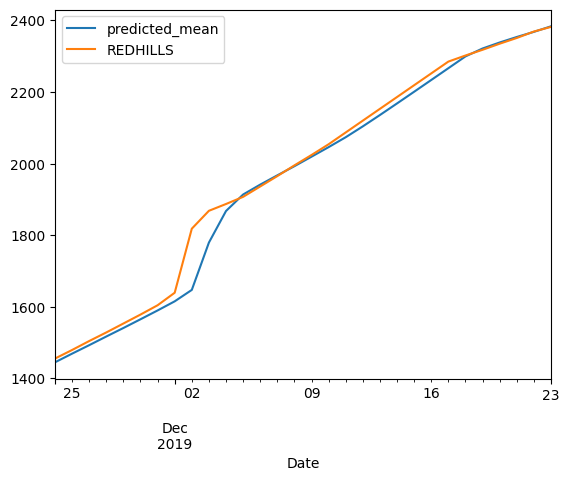

In [82]:
pred.plot(legend=True)
test['REDHILLS'].plot(legend=True)

In [83]:
test['REDHILLS'].mean()

1971.7666666666667

In [84]:
rmse3=sqrt(mean_squared_error(pred,test['REDHILLS']))
print(rmse3)

37.157878743261726


In [85]:
pred = result3.predict(start=len(data), end=len(data)+20000, typ='levels').rename('ARIMA Predictions2')

# Create a new index for the prediction period
index_future_dates = pd.date_range(start='2019-12-24', periods=len(pred))

# Assign the new index to the predictions
pred.index = index_future_dates

print(pred)

2019-12-24    2396.450212
2019-12-25    2409.319516
2019-12-26    2421.311870
2019-12-27    2432.487031
2019-12-28    2442.900686
                 ...     
2074-09-22    2585.308119
2074-09-23    2585.308119
2074-09-24    2585.308119
2074-09-25    2585.308119
2074-09-26    2585.308119
Freq: D, Name: ARIMA Predictions2, Length: 20001, dtype: float64


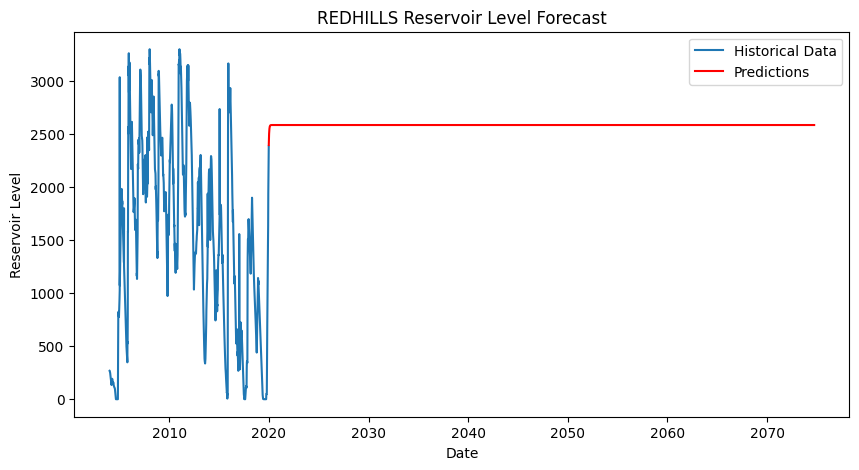

In [86]:
plt.figure(figsize=(10,5))
plt.plot(data['REDHILLS'], label='Historical Data')
plt.plot(pred, label='Predictions', color='red')
plt.title('REDHILLS Reservoir Level Forecast')
plt.xlabel('Date')
plt.ylabel('Reservoir Level')
plt.legend()
plt.show()

In [87]:
# Save the model
with open('arima_model3.pkl', 'wb') as pkl:
    pickle.dump(result3, pkl)

In [88]:
stepwise_fit1 = auto_arima(data['CHEMBARAMBAKKAM'], trace=True, suppress_warnings=True)
stepwise_fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=67670.454, Time=2.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=68181.631, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=67682.177, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=67677.431, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=68179.690, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=67668.685, Time=1.73 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=67672.899, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=67671.859, Time=0.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=67676.958, Time=2.85 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=67673.121, Time=2.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=67672.685, Time=1.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=23.92 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=67666.803, Time=0.85 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=67671.003, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5836
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -33829.401
Date:                Sun, 04 Aug 2024   AIC                          67666.803
Time:                        09:47:58   BIC                          67693.489
Sample:                    01-01-2004   HQIC                         67676.083
                         - 12-23-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6278      0.045    -14.014      0.000      -0.716      -0.540
ma.L1          0.3273      0.045      7.298      0.000       0.239       0.415
ma.L2         -0.1458      0.014    -10.449      0.000      -0.173      -0.118
sigma2      6365.8464      8.593    740.782      0.000    6349.004    6382.689
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          53051135.75
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             7.51
Prob(H) (two-sided):                  0.00   Kurtosis:                       469.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
model1 = ARIMA(data['CHEMBARAMBAKKAM'], order=(1, 1, 2))
result4 = model1.fit()

# Display the summary
print(result4.summary())

                               SARIMAX Results                                
Dep. Variable:        CHEMBARAMBAKKAM   No. Observations:                 5836
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -33829.401
Date:                Sun, 04 Aug 2024   AIC                          67666.803
Time:                        09:48:42   BIC                          67693.489
Sample:                    01-01-2004   HQIC                         67676.083
                         - 12-23-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6278      0.045    -14.014      0.000      -0.716      -0.540
ma.L1          0.3273      0.045      7.298      0.000       0.239       0.415
ma.L2         -0.1458      0.014    -10.449      0.0

In [90]:
start=len(train)
end=len(train)+len(test)-1
pred=result4.predict(start=start, end=end, typ='levels')
print(pred)

2019-11-24     572.127375
2019-11-25     590.099356
2019-11-26     608.222818
2019-11-27     626.178330
2019-11-28     644.210884
2019-11-29     649.603898
2019-11-30     650.467336
2019-12-01     649.571956
2019-12-02     718.970299
2019-12-03     859.042778
2019-12-04     999.598645
2019-12-05    1076.695427
2019-12-06    1114.022974
2019-12-07    1134.888275
2019-12-08    1148.642798
2019-12-09    1161.360781
2019-12-10    1173.381547
2019-12-11    1185.479400
2019-12-12    1199.548712
2019-12-13    1214.430283
2019-12-14    1229.333388
2019-12-15    1248.544452
2019-12-16    1269.241239
2019-12-17    1290.079721
2019-12-18    1311.787820
2019-12-19    1345.604462
2019-12-20    1383.080930
2019-12-21    1420.642515
2019-12-22    1458.709681
2019-12-23    1495.924364
Freq: D, Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

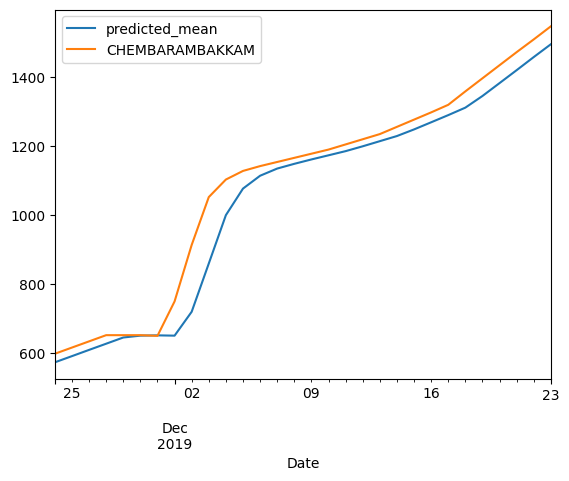

In [91]:
pred.plot(legend=True)
test['CHEMBARAMBAKKAM'].plot(legend=True)

In [92]:
test['CHEMBARAMBAKKAM'].mean()

1091.8333333333333

In [93]:
rmse4=sqrt(mean_squared_error(pred,test['CHEMBARAMBAKKAM']))
print(rmse4)

63.96004811683235


In [94]:
pred = result4.predict(start=len(data), end=len(data)+20000, typ='levels').rename('ARIMA Predictions2')

# Create a new index for the prediction period
index_future_dates = pd.date_range(start='2019-12-24', periods=len(pred))

# Assign the new index to the predictions
pred.index = index_future_dates

print(pred)

2019-12-24    1533.709088
2019-12-25    1535.090927
2019-12-26    1534.223383
2019-12-27    1534.768043
2019-12-28    1534.426095
                 ...     
2074-09-22    1534.557978
2074-09-23    1534.557978
2074-09-24    1534.557978
2074-09-25    1534.557978
2074-09-26    1534.557978
Freq: D, Name: ARIMA Predictions2, Length: 20001, dtype: float64


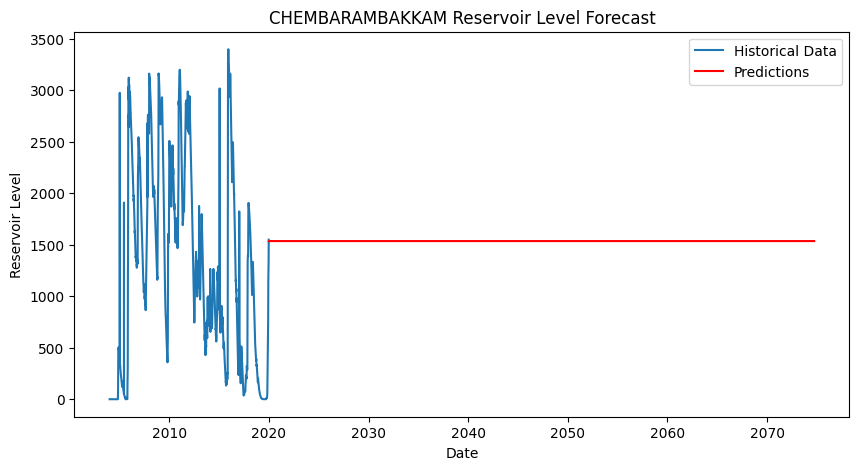

In [95]:
plt.figure(figsize=(10,5))
plt.plot(data['CHEMBARAMBAKKAM'], label='Historical Data')
plt.plot(pred, label='Predictions', color='red')
plt.title('CHEMBARAMBAKKAM Reservoir Level Forecast')
plt.xlabel('Date')
plt.ylabel('Reservoir Level')
plt.legend()
plt.show()

<Axes: >

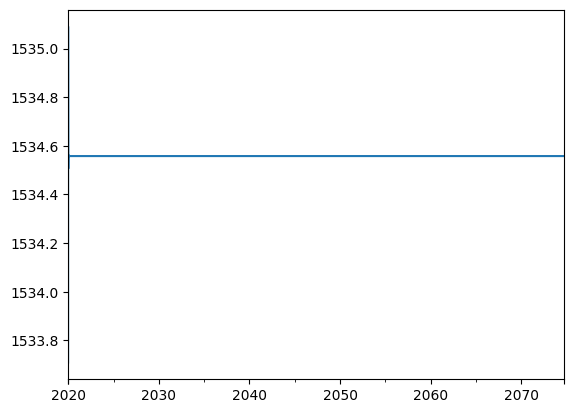

In [96]:
pred.plot()

In [97]:
with open('arima_model4.pkl', 'wb') as pkl:
    pickle.dump(result4, pkl)

In [98]:
models = {
    "POONDI": 'arima_model1.pkl',
    "CHOLAVARAM": 'arima_model2.pkl',
    "REDHILLS": 'arima_model3.pkl',
    "CHEMBARAMBAKKAM": 'arima_model4.pkl'
}

Predicted water availability for 2020-05-15 in CHOLAVARAM: 57.33


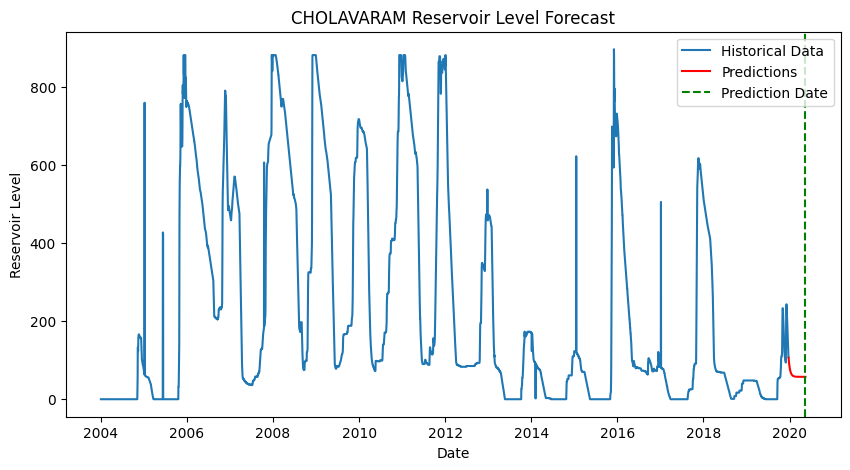

In [100]:
def predict_water_availability(reservoir_name, future_date):
    future_date = pd.to_datetime(future_date)
    last_date = data.index[-1]
    days_to_predict = (future_date - last_date).days

    # Load the appropriate model for the reservoir
    with open(models[reservoir_name], 'rb') as f:
        model = pickle.load(f)
    
    # Generate predictions for the required number of days
    pred = model.predict(start=len(data), end=len(data) + days_to_predict - 1, typ='levels')
    
    # Create a new index for the prediction period
    index_future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(pred))
    
    # Assign the new index to the predictions
    pred.index = index_future_dates
    
    # Retrieve the prediction for the specified future date
    prediction_for_date = pred[future_date]
    
    return pred, prediction_for_date

# Example usage
reservoir_name = 'CHOLAVARAM'
random_future_date = '2020-05-15'
pred, predicted_value = predict_water_availability(reservoir_name, random_future_date)
print(f"Predicted water availability for {random_future_date} in {reservoir_name}: {predicted_value:.2f}")

# Plot the predictions along with the historical data
plt.figure(figsize=(10, 5))
plt.plot(data[reservoir_name], label='Historical Data')
plt.plot(pred, label='Predictions', color='red')
plt.axvline(pd.to_datetime(random_future_date), color='green', linestyle='--', label='Prediction Date')
plt.title(f'{reservoir_name} Reservoir Level Forecast')
plt.xlabel('Date')
plt.ylabel('Reservoir Level')
plt.legend()
plt.show()